# Introduction

The group consists of one student, Celestino Machado number 21190.

This project was made in the context of FAI curricular unit, with the objective of developing four machine learning algorithms, two for unsupervised learning and two for supervised learning.

# Datasets and EDA

In this project two datasets were the first used titled "Data Science Job Salaries", can be found at https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/data.

The second one, was used only for the Apriori algorithm, named Amazon Sales Dataset can be found at https://www.kaggle.com/code/mehakiftikhar/amazon-sales-dataset-eda/input.

In [1]:
# linear algebra and data processing libraries
import numpy as np
import pandas as pd

# Graphics Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Utils
from collections import Counter
import warnings

# Drive
from google.colab import drive

# it will ask for your google drive credentiaals
drive.mount('/content/gDrive/', force_remount=True)

# Read the file
dataset_file = pd.read_csv('/content/gDrive/MyDrive/Colab Notebooks/FAI24_G09/ds_salaries.csv')

Mounted at /content/gDrive/


In [2]:
#Variable Description
# Print top examples
dataset_file.head()

# Display basic information about the DataFrame
print(dataset_file.info())

# Display descriptive statistics for numerical features
print(dataset_file.describe())

# Display unique values for categorical features
for column in dataset_file.columns:
  if dataset_file[column].dtype == object:
    print(f"\nUnique values for {column}:")
    print(dataset_file[column].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None
       Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  

['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


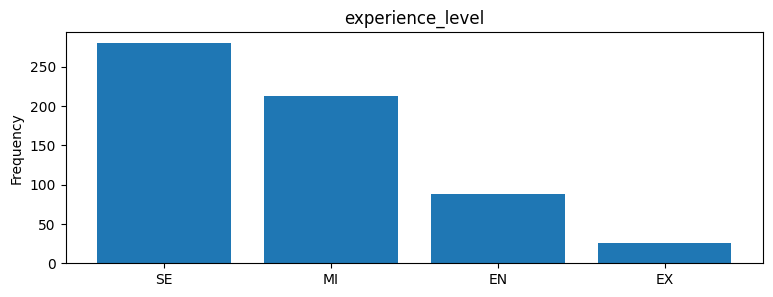

experience_level: 
 experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64


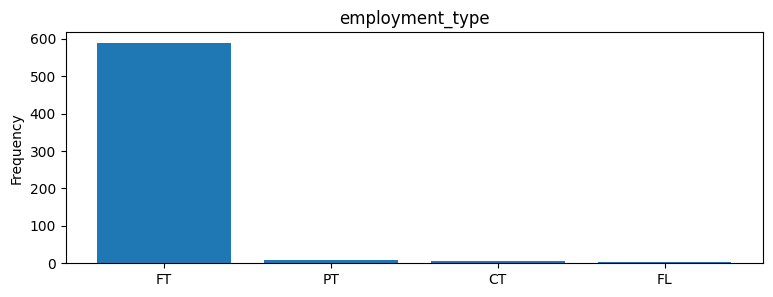

employment_type: 
 employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64


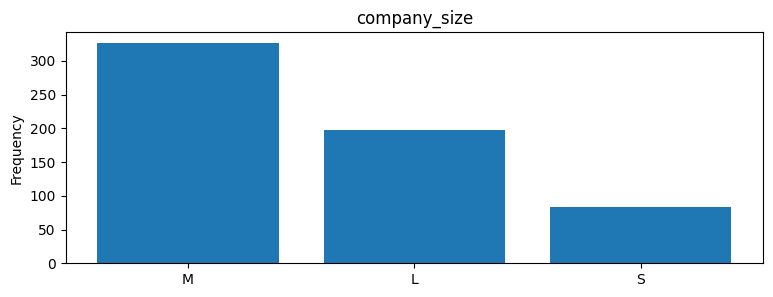

company_size: 
 company_size
M    326
L    198
S     83
Name: count, dtype: int64


In [3]:
# Univariate Variable Analysis: Categorical and Numerical Variables
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = dataset_file[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
# Get the categorical variables from train_df
categorical_features = [feature for feature in dataset_file.columns if dataset_file[feature].dtype == object]
print(categorical_features)
# Plot categorial_features with less than 10 distinct values
for cf in categorical_features:
  if dataset_file[cf].nunique() < 10:
    bar_plot(cf)


['Unnamed: 0', 'work_year', 'salary', 'salary_in_usd', 'remote_ratio']


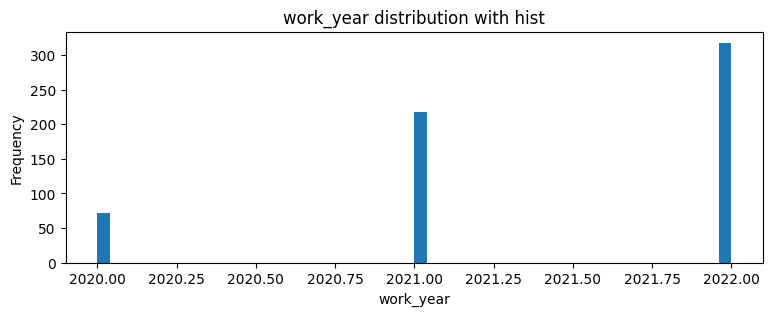

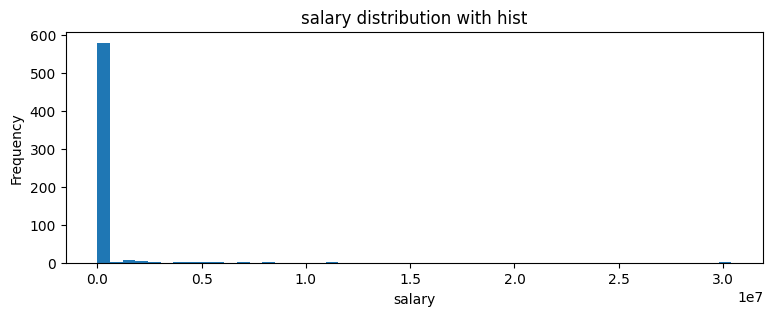

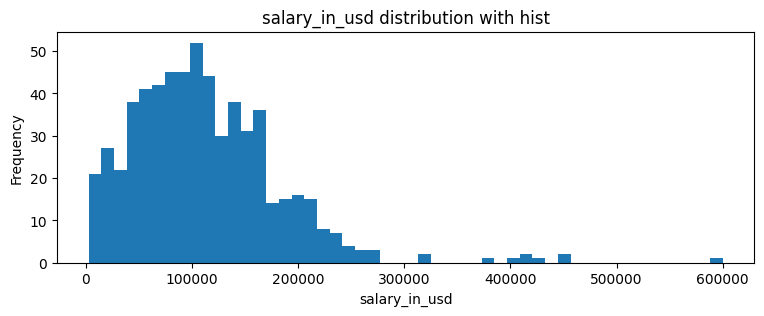

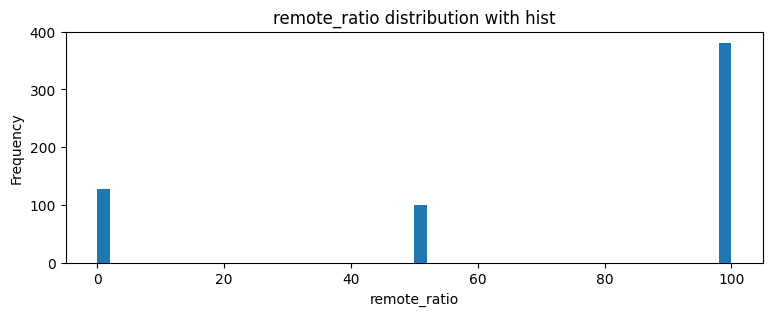

In [4]:
# Visualize frequency and distribution of numerical features
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset_file[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()
# Get the numerical variables from train_df
numerical_features = [feature for feature in dataset_file.columns if dataset_file[feature].dtype != object]
print(numerical_features)
removed_nf = ["Unnamed: 0"]
for nf in numerical_features:
  if nf not in removed_nf:
    plot_hist(nf)



In [5]:
# Basic Data Analysis
# Plcass vs Survived
print("Experience Level vs Salary in USD")
display(pd.crosstab(dataset_file['experience_level'], dataset_file['salary_in_usd']))

# Sex vs Survived
print("\nEmployment Type vs Salary in USD")
display(pd.crosstab(dataset_file['employment_type'], dataset_file['salary_in_usd']))

# Sibsp vs Survived
print("\nEmployee Residence vs Salary in USD")
display(pd.crosstab(dataset_file['employee_residence'], dataset_file['salary_in_usd']))

# Parch vs Survived
print("\nCompany Size vs Salary in USD")
display(pd.crosstab(dataset_file['company_size'], dataset_file['salary_in_usd']))


Experience Level vs Salary in USD


salary_in_usd,2859,4000,5409,5679,5707,5882,6072,8000,9272,9466,...,276000,324000,325000,380000,405000,412000,416000,423000,450000,600000
experience_level,,,,,,,,,,,,,,,,,,,,,
EN,0,1,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
EX,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,1
MI,1,1,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,2,0
SE,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,0,0,0,0



Employment Type vs Salary in USD


salary_in_usd,2859,4000,5409,5679,5707,5882,6072,8000,9272,9466,...,276000,324000,325000,380000,405000,412000,416000,423000,450000,600000
employment_type,,,,,,,,,,,,,,,,,,,,,
CT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
FL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FT,1,2,0,1,1,1,2,1,1,1,...,1,1,1,1,1,1,0,1,2,1
PT,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Employee Residence vs Salary in USD


salary_in_usd,2859,4000,5409,5679,5707,5882,6072,8000,9272,9466,...,276000,324000,325000,380000,405000,412000,416000,423000,450000,600000
employee_residence,,,,,,,,,,,,,,,,,,,,,
AE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Company Size vs Salary in USD


salary_in_usd,2859,4000,5409,5679,5707,5882,6072,8000,9272,9466,...,276000,324000,325000,380000,405000,412000,416000,423000,450000,600000
company_size,,,,,,,,,,,,,,,,,,,,,
L,0,0,0,0,0,1,1,1,0,0,...,1,0,1,1,1,1,0,1,1,1
M,0,2,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
S,1,0,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0


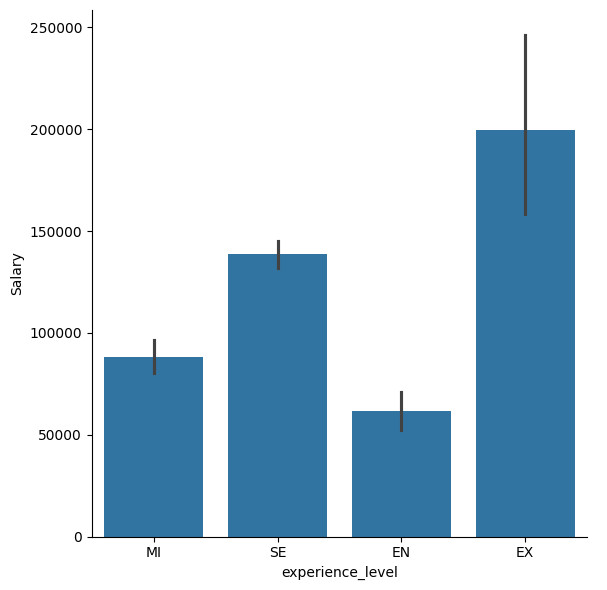

In [6]:
# Visualization
# Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived
g = sns.catplot(x="experience_level", y="salary_in_usd", data=dataset_file, kind="bar", height=6)
g.set_ylabels("Salary")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packa

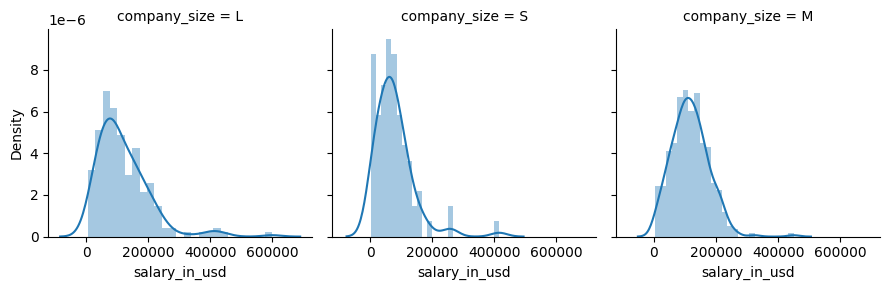

In [7]:
g = sns.FacetGrid(dataset_file, col = "company_size")
g.map(sns.distplot, "salary_in_usd", bins = 25)
plt.show()

In [8]:
# Outlier Detection
# function for finding outliers
#def detect_outliers(df,features):
#    outlier_indices = []
#
#    for c in features:
#        # 1st quartile
#        Q1 = np.percentile(df[c],25)
#        # 3rd quartile
#        Q3 = np.percentile(df[c],75)
#        # IQR
#        IQR = Q3 - Q1
#        # Outlier step
#        outlier_step = IQR * 1.5
#        # detect outlier and their indeces
#        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
#        # store indeces
#        outlier_indices.extend(outlier_list_col)
#
#    outlier_indices = Counter(outlier_indices)
#    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
#
#    return multiple_outliers
#
## find outliers
#dataset_file.loc[detect_outliers(dataset_file, ['salary_in_usd'])]
## drop outliers
#train_df = dataset_file.drop(detect_outliers(dataset_file,['salary_in_usd']),axis = 0).reset_index(drop = True)

In [9]:
# Missing Value - find and fill
# find age null values
# get variables with null values
dataset_file.columns[dataset_file.isnull().any()]
# list number of null values per variable
dataset_file.isnull().sum()

,0
Unnamed: 0,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0


# Imports and Loading the dataset

In [11]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from google.colab import drive


In [12]:
# it will ask for your google drive credentiaals
drive.mount('/content/gDrive/', force_remount=True)

Mounted at /content/gDrive/


In [13]:
# Read the file
dataset_file = pd.read_csv('/content/gDrive/MyDrive/Colab Notebooks/FAI24_G09/ds_salaries.csv')
datascience_data = pd.DataFrame(dataset_file)

In [14]:
datascience_data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


# Data Preprocessing
In order to prepare the dataset for analysis, categorical variables were encoded to numerical values. This preprocessing ensures the data is compatible with machine learning algorithms and statistical analyses. On the other hand, it was also ran a verification for missing values that proved the dataset was all ready to go.

In [15]:
# Cleaning my dataset
# Encode 'experience_level'
experience_level_mapping = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
datascience_data['experience_level'] = datascience_data['experience_level'].map(experience_level_mapping)

# Encode 'employment_type'
employment_type_mapping = {'PT': 0, 'FT': 1, 'CT': 2, 'FL': 3}
datascience_data['employment_type'] = datascience_data['employment_type'].map(employment_type_mapping)

# Encode 'company_size'
company_size_mapping = {'S': 0, 'M': 1, 'L': 2}
datascience_data['company_size'] = datascience_data['company_size'].map(company_size_mapping)

# Encode 'salary_currency'
salary_currency_mapping = {'USD': 0, 'EUR': 1, 'GBP': 2}  # Extend as needed
datascience_data['salary_currency'] = datascience_data['salary_currency'].map(salary_currency_mapping)

# Encode 'employee_residence' and 'company_location'
# Use Label Encoding for country codes
le = LabelEncoder()
datascience_data['employee_residence'] = le.fit_transform(datascience_data['employee_residence'])
datascience_data['company_location'] = le.fit_transform(datascience_data['company_location'])

# Encode 'job_title' using Label Encoding (or One-Hot Encoding if preferred)
datascience_data['job_title'] = le.fit_transform(datascience_data['job_title'])

In [16]:
# Split into train and test samples
x = datascience_data.drop('experience_level', axis=1)
y = datascience_data['experience_level']

# Holdout 30% for testing - random_state=42 will result in a 100% accuracy
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=27)

# Decision Tree
The main objective defined at the beggining was to develop a Decision Tree algorithm to predict the experience level of data science professionals.

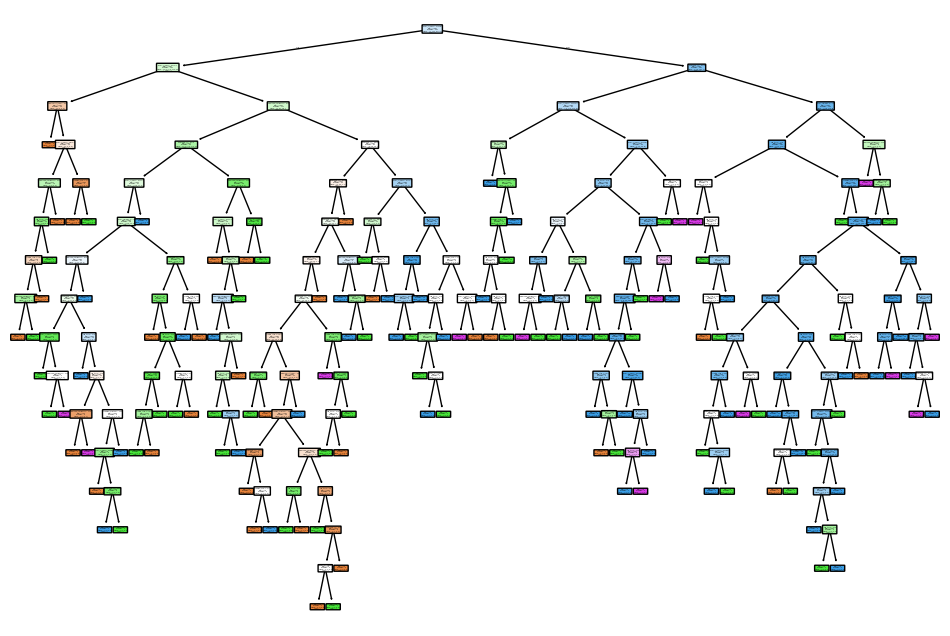

In [17]:
# Create a decision tree model
dt_classifier = DecisionTreeClassifier(random_state=1234)
dt_classifier = dt_classifier.fit(X_train, y_train)

# Visualization of the tree model dt_classifier

plt.figure(figsize=(12,8))
tree.plot_tree(dt_classifier,
               feature_names=x.columns,
               class_names=[str(cls) for cls in y.unique()],
               filled=True,
               rounded=True)
plt.show()

Accuracy: 0.5737704918032787
              precision    recall  f1-score   support

           0       0.33      0.23      0.27        26
           1       0.63      0.61      0.62        80
           2       0.59      0.70      0.64        71
           3       0.00      0.00      0.00         6

    accuracy                           0.57       183
   macro avg       0.39      0.39      0.38       183
weighted avg       0.55      0.57      0.56       183



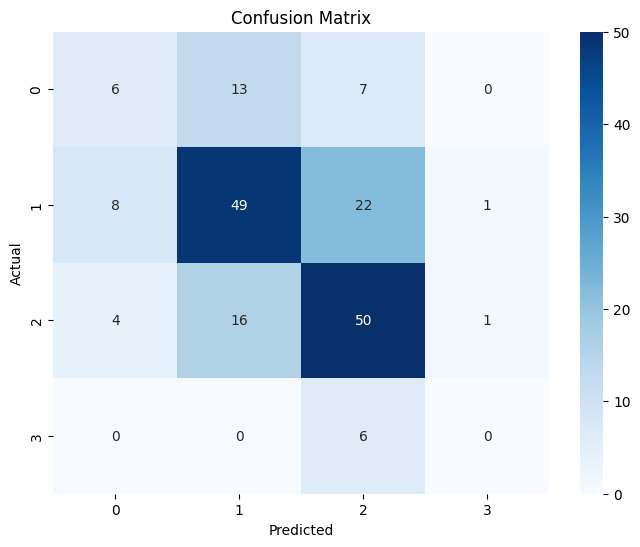

In [18]:
#Model Assessment
# Assess the model
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report
print(classification_report(y_test,y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Results Analysis
The decision tree achieved an accuracy of 57.4%, which reflects moderate performance but highlights areas for improvement.

After analysing the classification report it was noticeable that the algorithm performed better for classes 1(Mid-Level) and 2(Senior-Level), which have the most samples in the dataset. This can be confirmed by these two having the highest values for precision and recall.
On the other hand the analysis revealed some weaknesses of the algorithm, both class 0(Entry-Level) and 3(Executive-Level) are poorly classified. Class 3 is especially problematic due to having 0 correct classifications.

Furthermore, the confusion matrix revealed that class 1 and class 2 get often confused with each other. It was also revealed that class 0 was often missclassified to class 1 and class 3 was missclassified for class 2.

# Random Forests

The main objective defined at the beggining was to develop a Random Forests algorithm to predict the experience level of data science professionals.

In [19]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

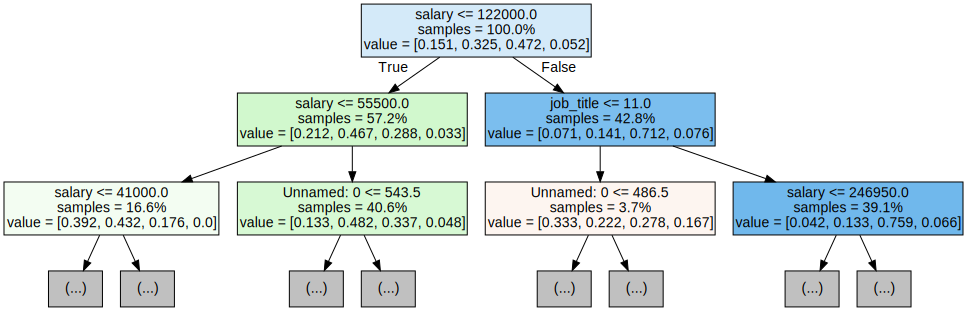

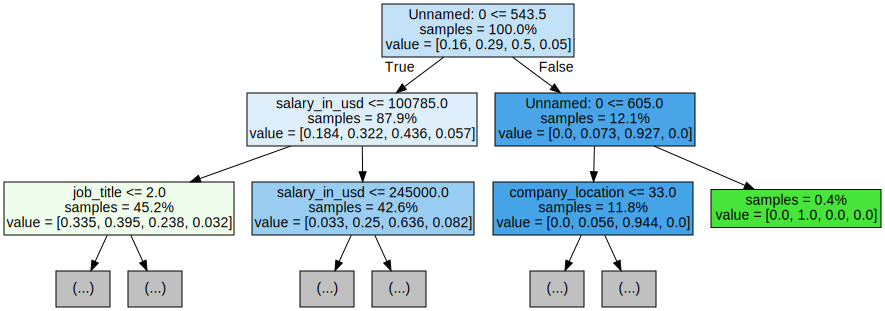

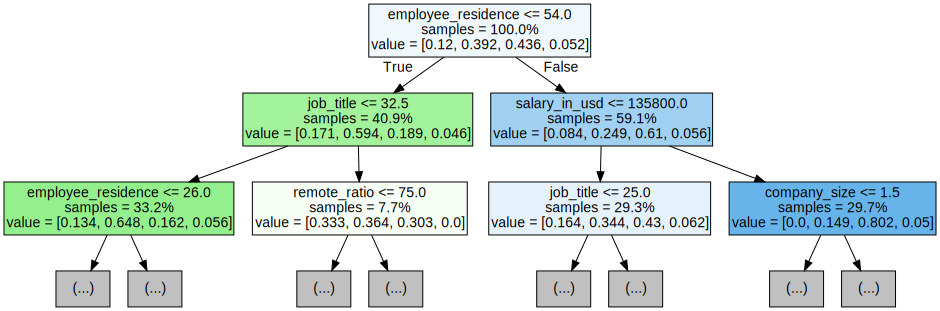

In [20]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [21]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6284153005464481


              precision    recall  f1-score   support

           0       0.40      0.31      0.35        26
           1       0.68      0.60      0.64        80
           2       0.65      0.83      0.73        71
           3       0.00      0.00      0.00         6

    accuracy                           0.63       183
   macro avg       0.43      0.43      0.43       183
weighted avg       0.60      0.63      0.61       183



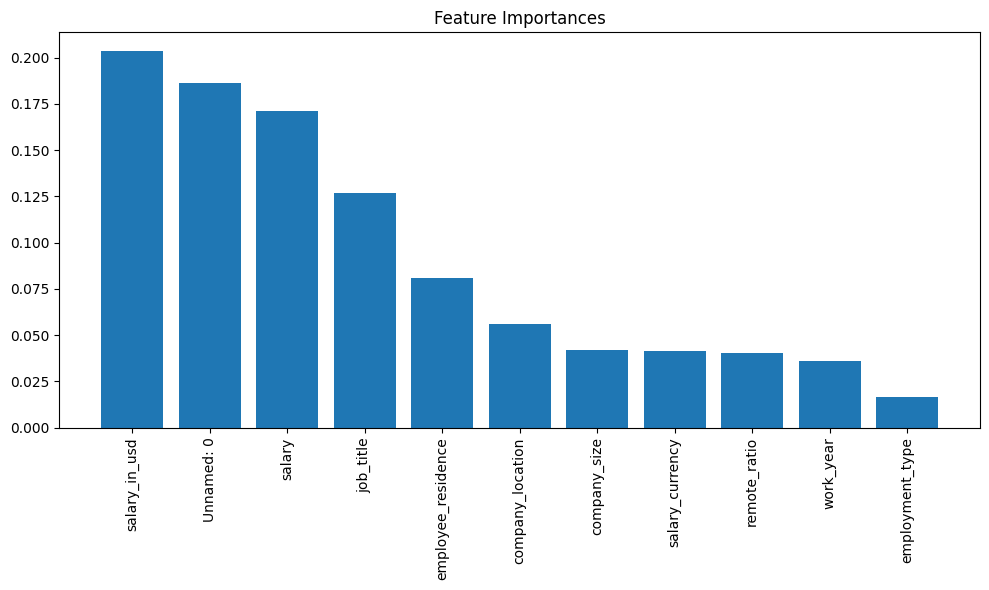

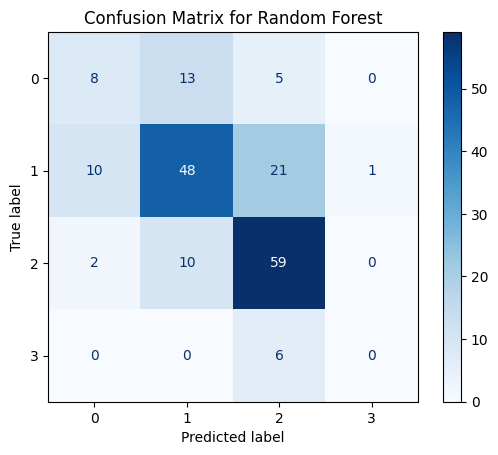

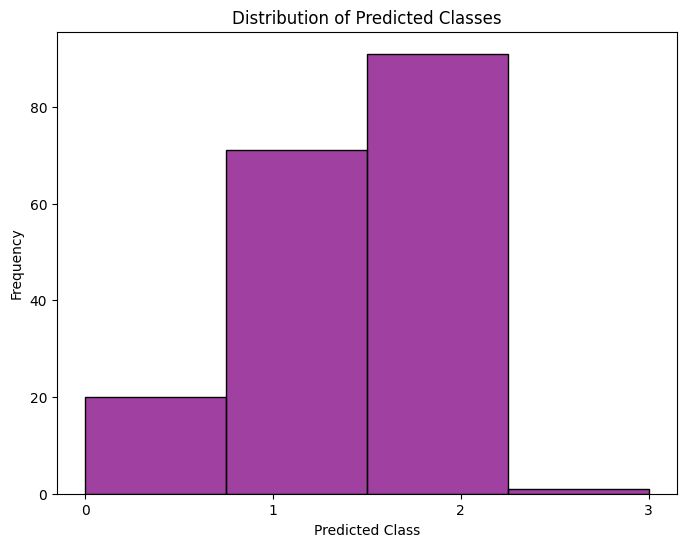

In [22]:
# Classification Report
print(classification_report(y_test,y_pred))

# Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Distribution of Predictions
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, bins=len(np.unique(y)), kde=False, color="purple")
plt.title("Distribution of Predicted Classes")
plt.xlabel("Predicted Class")
plt.ylabel("Frequency")
plt.xticks(np.unique(y))
plt.show()

##Results Analysis

The Random Forest algorithm achieved an accuracy of 60%, indicating, like the prior algorithm, a moderate ability to classify the experience level.

The classification report revealed that class2(Senior-Level) had the best performance with a recall of 82%, a precision of 64%, which indicates some false positives and an F1-score of 0.72, showing high reliability. After that, class1(Mid-Level) has the second highest recall of 55% indicating a slightly above average classification, on the other hand the precision is 65% which shows moderate confidence, with the F1-score of 0.59 it has a medium performance.
Even though the algorithm had slightly positive results for classes 1 and 2, the same can't be said about classes 0(Entry-Level) and 3(Executive-Level). Class 0 is completly missclassified with 0% recall and precision, on the other hand class 3 managed a bellow average recall(31%), precision(35%), F1-score(0.33) which reflects the weaker classification ability.

In summary the model performs well on classes 1 and 2, but struggles, a lot with classes 0 and 3.

# K-Means

The goal of this analysis was to apply K-means clustering to group data points into distinct clusters based on common attributes. This aproach aimed to identify patterns in the data, such as trens in salaries, work preferences, or company sizes, using clustering to reveal insights that could guide decision-making or further analysis.


In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [24]:
selected_features = ['salary_in_usd', 'remote_ratio', 'experience_level', 'employment_type', 'company_size']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(datascience_data[selected_features])
scaled_data = pd.DataFrame(scaled_data, columns=selected_features)
scaled_data

,salary_in_usd,remote_ratio,experience_level,employment_type,company_size
0,-0.457904,-1.743615,-0.512162,-0.021875,1.240346
1,2.083282,-1.743615,0.761946,-0.021875,-1.820182
2,-0.046177,-0.514377,0.761946,-0.021875,-0.289918
3,-1.301826,-1.743615,-0.512162,-0.021875,-1.820182
4,0.531774,-0.514377,0.761946,-0.021875,1.240346
...,...,...,...,...,...
602,0.588192,0.714862,0.761946,-0.021875,-0.289918
603,0.193263,0.714862,0.761946,-0.021875,-0.289918
604,0.235577,-1.743615,0.761946,-0.021875,-0.289918
605,0.531774,0.714862,0.761946,-0.021875,-0.289918


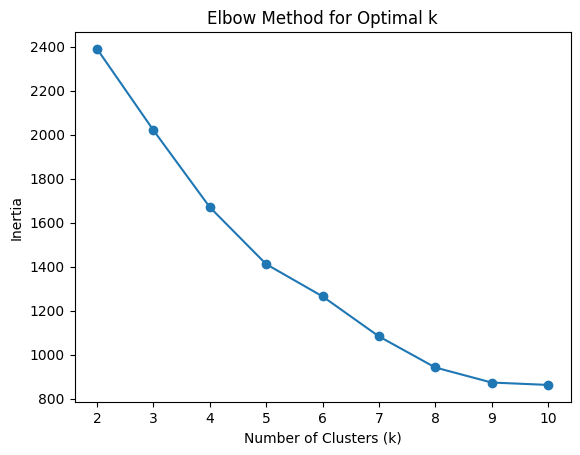

In [25]:
# Test k values from 2 to 10
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(metrics.silhouette_score(scaled_data, kmeans.labels_))

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
#AHHHHHHHHHHH meio dificil mas decidi o 5

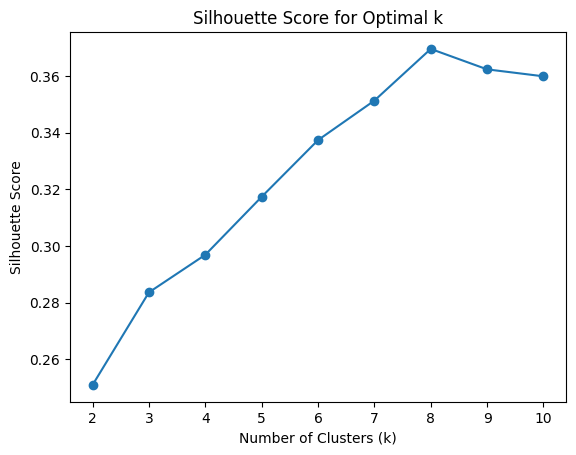

In [26]:
# Silhouette
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()
#AHHHHHH after taking a look at the silhouette score I can see the correct k value is 8 very cool comparison

In [27]:
# Perform K-Means clustering with k=8
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(scaled_data)  # scaled_data is the preprocessed DataFrame or NumPy array

# Get the cluster assignments for each data point
clusters = kmeans.labels_

# Add cluster labels to the original data
datascience_data['cluster'] = clusters

In [28]:
from sklearn.decomposition import PCA

cluster_summary = datascience_data.groupby('cluster').agg(['mean', 'median', 'std'])
print(cluster_summary)

         Unnamed: 0                       work_year                    \
               mean median         std         mean  median       std   
cluster                                                                 
0        203.982759  179.0  151.202541  2020.965517  2021.0  0.631507   
1        393.727273  380.5  156.481910  2021.767045  2022.0  0.509615   
2        278.277228  253.0  171.174538  2021.287129  2021.0  0.725764   
3        341.093750  354.5  157.878064  2021.640625  2022.0  0.626585   
4        284.862069  238.0  169.151385  2021.362069  2021.0  0.612681   
5        196.400000  118.5  163.374961  2021.000000  2021.0  0.666667   
6        233.500000  196.0  182.657238  2021.000000  2021.0  0.816497   
7        277.012821  270.0  173.057718  2021.307692  2021.0  0.726273   

        experience_level                  employment_type  ...  \
                    mean median       std            mean  ...   
cluster                                                    ...  

In [29]:
from scipy.stats import f_oneway

# Example for a single feature
f_stat, p_value = f_oneway(*[datascience_data[datascience_data['cluster'] == c]['salary_in_usd']
                             for c in datascience_data['cluster'].unique()])
print("ANOVA F-statistic:", f_stat, "P-value:", p_value)

ANOVA F-statistic: 95.41557051257968 P-value: 3.5562430940659627e-93


In [30]:
overall_means = scaled_data[selected_features].mean()
# Flatten the multi-level column index in cluster_summary
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns]

# Align the overall_means index with cluster_summary
overall_means = overall_means.add_suffix('_mean')

# Subtract overall_means from cluster_summary to get distinctive features
distinctive_features = cluster_summary.loc[:, cluster_summary.columns.str.endswith('_mean')] - overall_means

# Display the distinctive features
print(distinctive_features)


         Unnamed: 0_mean  company_location_mean  company_size_mean  \
cluster                                                              
0                    NaN                    NaN           2.000000   
1                    NaN                    NaN           0.892045   
2                    NaN                    NaN           0.584158   
3                    NaN                    NaN           1.328125   
4                    NaN                    NaN           1.724138   
5                    NaN                    NaN           0.800000   
6                    NaN                    NaN           1.000000   
7                    NaN                    NaN           0.987179   

         employee_residence_mean  employment_type_mean  experience_level_mean  \
cluster                                                                         
0                            NaN          1.008621e+00               1.000000   
1                            NaN          1.005682e+00  

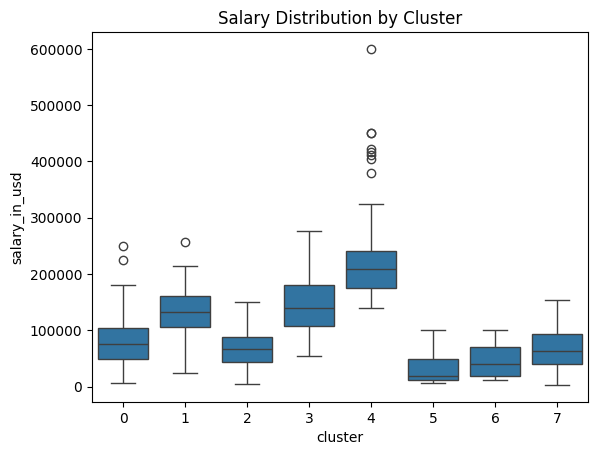

In [31]:
sns.boxplot(x='cluster', y='salary_in_usd', data=datascience_data)
plt.title('Salary Distribution by Cluster')
plt.show()

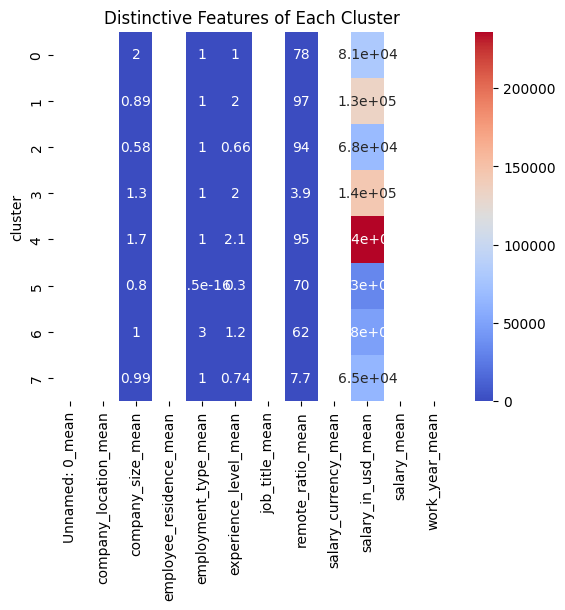

In [32]:
import seaborn as sns

sns.heatmap(distinctive_features, annot=True, cmap='coolwarm')
plt.title('Distinctive Features of Each Cluster')
plt.show()

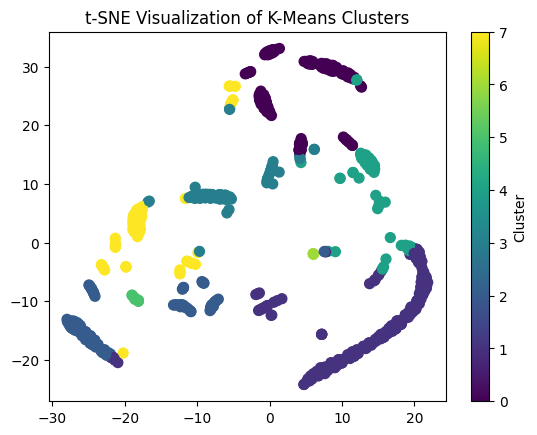

In [33]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("t-SNE Visualization of K-Means Clusters")
plt.colorbar(label='Cluster')
plt.show()

##Results Analysis

Cluster summary: Each cluster highlights unique patterns based on features like experience level, salary, remote ratio, and company size. For example, clusters with high experience levels, such as cluster 4, show significantly higher mean salaries. Remote work appears to be common across clusters 1,2, and 4, with nearly 100% remote ratios, while on-site roles, such as those in cluster 3, align with higher salaries and senior positions. Larger companies dominate cluster 0, whereas smaller companies are more prevelant in clusters 1, 2, and 5.

ANOVA: The ANOVA analysis revealed statitically significant differences in salary across clusters, with an F-statistic of 95.42 and a p-value close to zero(3.56e^-96). This confirms that salary is a critical differentiator between clusters, making it one of the most defining characteristics in this segmentation.

Boxplot: The boxplot of salary distribution by cluster reveals significant variation in salaries across different clusters. Cluster 4 stands out with the highest salary range and median, including notable outliers exceeding $400,000, indicating roles associated with senior, high-experience positions. Cluster 3 also shows a wide salary range and high median, suggesting a mix of senior and mid-level roles. In contrast, Clusters 5 and 6 exhibit the lowest salary ranges and medians, reflecting entry-level positions or roles in smaller organizations. Clusters 1 and 2 have moderate, consistent salary distributions, indicative of mid-level roles, while Clusters 0 and 7 show mixed entry- to mid-level salaries with lower outliers. These findings highlight the relationship between salary, experience, and company characteristics, underscoring the effectiveness of clustering in uncovering these distinctions.

Heatmap: The heatmap illustrates the distinctive features of each cluster by showcasing the mean values of various attributes. Cluster 4 stands out with the highest mean salary, exceeding $200,000, along with significant experience levels, likely representing senior professionals in prominent organizations. Cluster 3 has moderate salaries paired with mid-level experience and specialized job titles, suggesting experienced professionals in balanced roles. Clusters 5 and 6 are characterized by low salaries and high remote work ratios, reflecting entry-level or small-company roles with remote work opportunities. Clusters 0 and 1 exhibit mid-range salaries and a mix of company sizes and employment types, indicating a variety of roles with average compensation. Cluster 2 combines low salaries with mid-sized companies, representing individuals transitioning between entry and mid-level positions. Finally, Cluster 7 is associated with smaller salary ranges, likely reflecting beginner-level or niche roles.

Overall, the clusters highlight distinct patterns in salary, experience, remote work prevalence, and company size, offering insights into the job market's diversity.

# Apriori

The primary goal of this project is to identify meaningful patterns in user behavior and product interactions on Amazon to derive actionable insights. Specifically, we aim to discover associations between different products purchased or reviewed by users using the Apriori algorithm.

##Data preparation

The dataset was first preprocessed to ensure that only relevant information was included for analysis. Columns unrelated to user-product interactions, such as product links, user names, and review content, were removed. Missing values in the dataset were also eliminated to ensure data quality and reliability.
To prepare the data for the Apriori algorithm, the remaining dataset was grouped by user_id and product_name, with the rating_count column aggregated using the sum function. This step captured the total rating count for each product-user combination. The resulting dataset was then transformed into a pivot table where rows represent users, columns represent products, and values were binary indicators (True/False) of whether a user interacted with a product.

In [34]:
# Read the file
dataset_file = pd.read_csv('/content/gDrive/MyDrive/Colab Notebooks/FAI24_G09/amazon.csv')
amazon_data = pd.DataFrame(dataset_file)

In [35]:
# 1. Drop irrelevant columns
columns_to_drop = ['img_link', 'product_link', 'about_product', 'user_name', 'review_id',
                   'review_title', 'review_content', 'discount_percentage']
amazon_data = amazon_data.drop(columns=columns_to_drop, axis=1)
amazon_data = amazon_data.dropna()


In [36]:
# Group
ds_grouped = amazon_data.groupby(['user_id', 'product_name'], as_index=False).agg({'rating_count':'sum'})
# Display the first few rows of the grouped dataset
print(ds_grouped.head(1))

                                             user_id  \
0  AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZA...   

                                        product_name rating_count  
0  Universal Remote Control for All Sony TV for A...        2,640  


In [37]:
# Ensure 'rating_count' is numeric (just in case it contains non-numeric data)
ds_grouped['rating_count'] = pd.to_numeric(ds_grouped['rating_count'], errors='coerce')

ds_pivot = pd.pivot(data=ds_grouped, index='user_id', columns='product_name', values='rating_count').fillna(0).applymap(lambda x: True if x > 0 else False)
ds_pivot.tail()

<ipython-input-37-51a7665adae7>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ds_pivot = pd.pivot(data=ds_grouped, index='user_id', columns='product_name', values='rating_count').fillna(0).applymap(lambda x: True if x > 0 else False)


product_name,!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!,!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!,"10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor","10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox","3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3"" x 3"" Size | For notes, reminders, study, school and organizing","3M Scotch Double Sided Heavy Duty Tape(1m holds 4.5Kgs) for indoor hanging applications (Photo frames, Mirrors, Key Holders, Car Interiors, Extension Boards, Wall decoration, etc)(L: 3m, W: 24mm)","4 in 1 Handheld Electric Vegetable Cutter Set,Wireless Food Processor Electric Food Chopper for Garlic Chili Pepper Onion Ginger Celery Meat with Brush",7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart tv Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys,7SEVEN® Bluetooth Voice Command Remote for Xiaomi Redmi Mi Smart TV with Netflix & Prime Video Hot Keys XMRM-00A,7SEVEN® Compatible Lg Smart Tv Remote Suitable for Any LG LED OLED LCD UHD Plasma Android Television and AKB75095303 replacement of Original Lg Tv Remote Control,...,"pTron Solero T351 3.5Amps Fast Charging Type-C to Type-C PD Data & Charging USB Cable, Made in India, 480Mbps Data Sync, Durable 1 Meter Long Cable for Type-C Smartphones, Tablets & Laptops (Black)","pTron Solero TB301 3A Type-C Data and Fast Charging Cable, Made in India, 480Mbps Data Sync, Strong and Durable 1.5-Meter Nylon Braided USB Cable for Type-C Devices for Charging Adapter (Black)","pTron Volta Dual Port 12W Smart USB Charger Adapter, Multi-Layer Protection, Made in India, BIS Certified, Fast Charging Power Adaptor Without Cable for All iOS & Android Devices (Black)","realme 10W Fast Charging Micro-USB Cable (Braided, Black)",realme Buds Classic Wired in Ear Earphones with Mic (Black),"realme Buds Wireless in Ear Bluetooth Earphones with mic, 11.2mm Bass Boost Driver, Magnetic Fast Pair, Fast Charging and 12 Hrs Playtime (Yellow)","realme narzo 50 (Speed Blue, 4GB RAM+64GB Storage) Helio G96 Processor | 50MP AI Triple Camera | 120Hz Ultra Smooth Display","realme narzo 50i (Mint Green, 2GB RAM+32GB Storage) Octa Core Processor | 6.5"" inch Large Display","rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver","tizum HDMI to VGA Adapter Cable 1080P for Projector, Computer, Laptop, TV, Projectors & TV"
user_id,,,,,,,,,,,,,,,,,,,,,
"AHZFKWGDBRQKNMNQ4ZPL52OZBRKA,AGBEFVJFOQIRF7C7KY5VN6XO7JEA,AGN47LODJXDWX6WWSS5JJLKP2HWQ,AGJRVBQJIVB445HIWTFCZOI37IQA,AHCNUZM2XGWJXQHPWYVZMS5CAEMA,AFQICBBGIA6ED2FXXYEVEVKDFOWQ,AELILYZUYXGJOFN2P7KT7OEUBM2Q,AEJHZ5W2C7AYFISGPX7WSDVSIYEQ",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"AHZJHJWFZLYD64GVP4PXVI2F4LXA,AEUCRZPOISXKHXMCZUH6BXTUXUWA,AFL2ICS3EEESPGYLFF7OTVYMLVJA,AG63J3CFIT6RYX32RHHYWRZ2WKKA,AE6EGCFBVJIZEZ4XPPIY3PES2SDQ,AHUZG5YJCM4UWL66ALQ744FD3OOA,AEIKB2XA64MPG7BBXRG4DT57QKPQ,AF4ECPZRARF7SK2GDSBPTINVA2CA",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"AHZNSNBVKQR4OGJAQHE4DCDA4YHA,AFBW6COTZXGHQMWVDUOSXVUCCIHQ,AFFRU7QVLXG4LNG6JKQKJ23KBA2A,AF5E74KNXXYBJVMG7HUYXNRNYY3A,AF4F4SKVD2UU7ZBJFZNNBK7ORIGA,AF3IVRFFILSUOKAXKRZBFBDRF7MQ,AF23WB7B2XKLYCA3KXEGKSBWYKOA,AHAJNAQDV3BHN5AYLY3LOWFJCS6A",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"AHZWJCVEIEI76H2VGMUSN5D735IQ,AH2DFUHFTG4CKQ

In [38]:
from mlxtend.frequent_patterns import apriori, association_rules
# Get the rules
min_support=0.0000001
freq_itemsets = apriori(ds_pivot, min_support=min_support, use_colnames=True)
freq_itemsets
# Get the number of itemsets in freq_itemsets
num_itemsets = len(freq_itemsets)
print(f'Number of itemsets: {num_itemsets}')
freq_itemsets.head()

# Get the rules
rules = association_rules(freq_itemsets, metric="support", min_threshold=min_support, num_itemsets= num_itemsets)
rules.sort_values('support', ascending=False).head(10)

Number of itemsets: 315


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB S...","(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
1,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...","(Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB S...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
18,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB S...","(Samsung Galaxy M04 Light Green, 4GB RAM, 64GB...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
17,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...","(Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB S...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
16,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB S...","(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
15,"(Samsung Galaxy M04 Light Green, 4GB RAM, 64GB...","(Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB S...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
14,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB S...","(Samsung Galaxy M04 Light Green, 4GB RAM, 64GB...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
13,"(boAt Newly Launched Wave Electra with 1.81"" H...","(boAt Newly Launched Wave Electra with 1.81"" H...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
12,"(boAt Newly Launched Wave Electra with 1.81"" H...","(boAt Newly Launched Wave Electra with 1.81"" H...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
11,(Zoul USB Type C Fast Charging 3A Nylon Braide...,(Zoul USB C 60W Fast Charging 3A 6ft/2M Long T...,0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0


In [42]:
# List the 10 rules with higher confidence
rules.sort_values('confidence', ascending=False).head(10)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB S...","(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
1,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...","(Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB S...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
18,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB S...","(Samsung Galaxy M04 Light Green, 4GB RAM, 64GB...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
17,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...","(Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB S...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
16,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB S...","(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
15,"(Samsung Galaxy M04 Light Green, 4GB RAM, 64GB...","(Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB S...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
14,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB S...","(Samsung Galaxy M04 Light Green, 4GB RAM, 64GB...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
13,"(boAt Newly Launched Wave Electra with 1.81"" H...","(boAt Newly Launched Wave Electra with 1.81"" H...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
12,"(boAt Newly Launched Wave Electra with 1.81"" H...","(boAt Newly Launched Wave Electra with 1.81"" H...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
11,(Zoul USB Type C Fast Charging 3A Nylon Braide...,(Zoul USB C 60W Fast Charging 3A 6ft/2M Long T...,0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


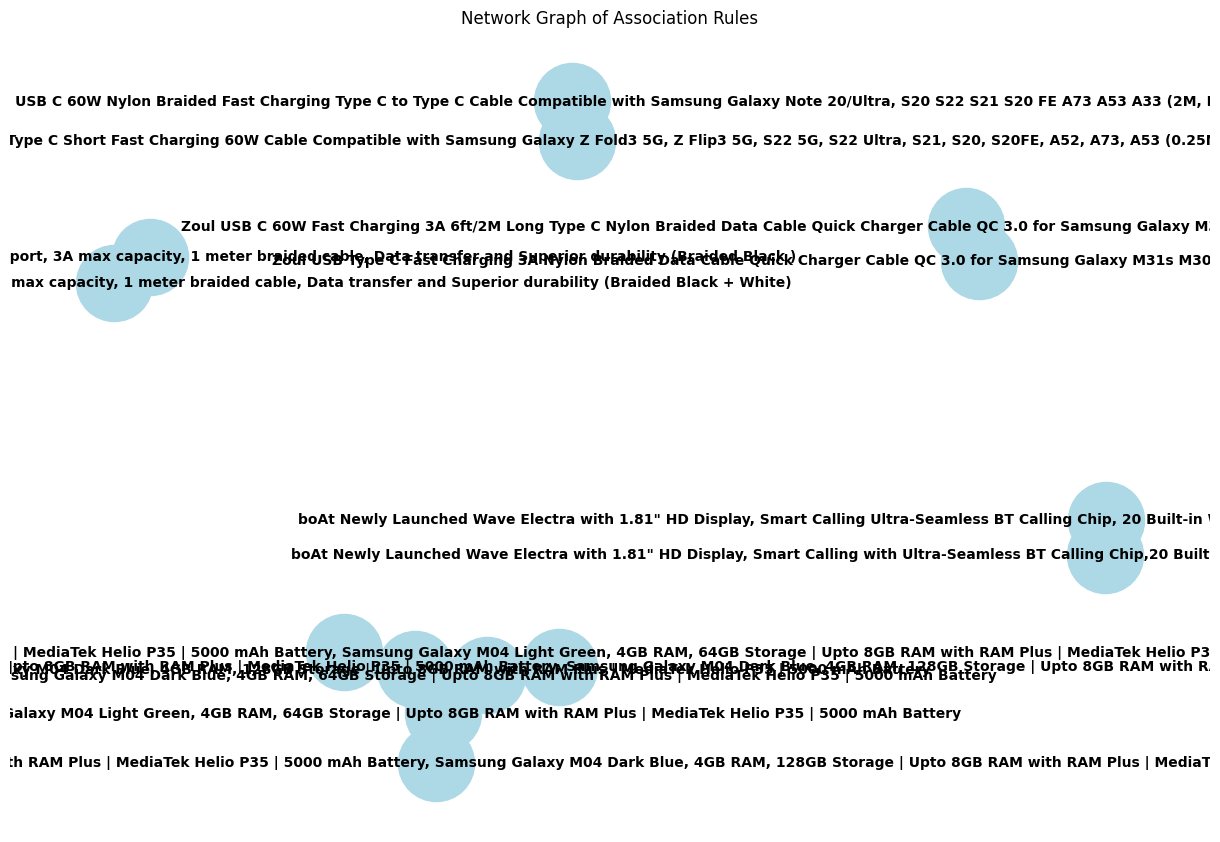

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.DiGraph()

# Add nodes and edges based on association rules
for _, rule in rules.iterrows():
    # Antecedents and consequents
    antecedents = ', '.join(list(rule['antecedents']))
    consequents = ', '.join(list(rule['consequents']))

    # Add edge with weight as confidence
    G.add_edge(antecedents, consequents, weight=rule['confidence'])

# Set edge weights (confidence levels) as labels
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.5)

# Add a title
plt.title("Network Graph of Association Rules")
plt.show()

##Results Analysis

The results of the association rule mining highlight strong relationships between specific products in the dataset. Notably, certain pairs of products, such as the Samsung Galaxy M04 models in different configurations (e.g., variations in storage and color) and accessories like fast charging cables, show confidence values of 1.0 and exceptionally high lift values, signifying perfect co-occurrence within the dataset. This indicates that customers who purchased one product in these pairs almost always purchased the other, suggesting a clear pattern of bundled purchasing behavior or strong product association.

The network graph further illustrates these relationships in a visually interpretable manner, where nodes represent individual products, and edges reflect the directional relationships between antecedents (if-part) and consequents (then-part) of the rules. The confidence values are represented as edge weights, and clusters in the graph highlight tightly connected groups of products, such as smartphones and their compatible accessories. For example, the Samsung Galaxy M04 in various configurations forms a dense cluster with its accessories, indicating a strong preference among users to purchase complementary items. Similarly, fast-charging cables and other smartphone accessories exhibit strong associations, often appearing in pairs or groups.